In [155]:
import pandas as pd


In [156]:
df = pd.read_csv("twitter_model.csv",index_col=0)
sales=pd.read_csv("sales_model.csv", index_col=0)

In [157]:
#STOPWORDS - DELETE STOPWORDS
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

In [158]:
stopWords = set(stopwords.words('english'))
stopWords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [159]:
#CLEAN DATA
import re
import string
def clean_text_1(text):
    # Lowercase
    text = text.lower()
    # Remove special text in brackets ([chorus],[guitar],etc)
    text = re.sub('\[.*?\]', '', text)
    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # Remove words containing numbers
    text = re.sub('\w*\d\w*', '', text)    
    # Remove quotes
    text = re.sub('[‘’“”…]', '', text)
    # Remove new line \n 
    text = re.sub('\n', ' ', text)
    # Remove stop_word
    stop_words = stopwords.words('english')
    words = word_tokenize(text)
    new_text = ""
    for w in words:
        if w not in stop_words and len(w) > 1:
            new_text = new_text + " " + w
    return new_text
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk import word_tokenize, pos_tag
wnl = WordNetLemmatizer()
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
data_clean = pd.DataFrame(df.text.apply(clean_text_1))

In [160]:
#LEMMATIZER

from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

def lemmatize_tag(text):
    lemma=[]
    for i,j in pos_tag(word_tokenize(text)) :
        p=j[0].lower()
        if p in ['j','n','v']:
            if p == 'j':
                p = 'a'
            lemma.append(wnl.lemmatize(i,p))
        else :
            lemma.append(wnl.lemmatize(i))    
    return ' '.join(lemma)

In [161]:
#apply lemmatizer
data_clean_OK = pd.DataFrame(data_clean.text.apply(lemmatize_tag))

In [162]:
data_clean_OK

,text
ID_SALES,
HD1927A,lastly company thats try put love fly would ni...
ST4244A,u cant get state play hunt destinationdragons ...
HD108A,already pleasant flight london charlotte make ...
HD4335A,could even see tried make transaction wouldnt ...
HN416A,seriously cat dead im go pissedvery thankful e...
...,...
HC3660A,friend tell able use credit airline towards on...
HD3916A,bit steamed conjunction wmy new wait first sit...
HD2061T,nyc flight delay miss connection sacramento ch...


In [163]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

stop_words

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [164]:
# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean_OK.text)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean_OK.index

In [165]:
stop_words2=[]
for w in stop_words:
    stop_words2.append(w)

In [166]:

# Let's make some word clouds
!conda config --append channels conda-forge
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
wc = WordCloud(collocations=False,stopwords=stop_words2, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

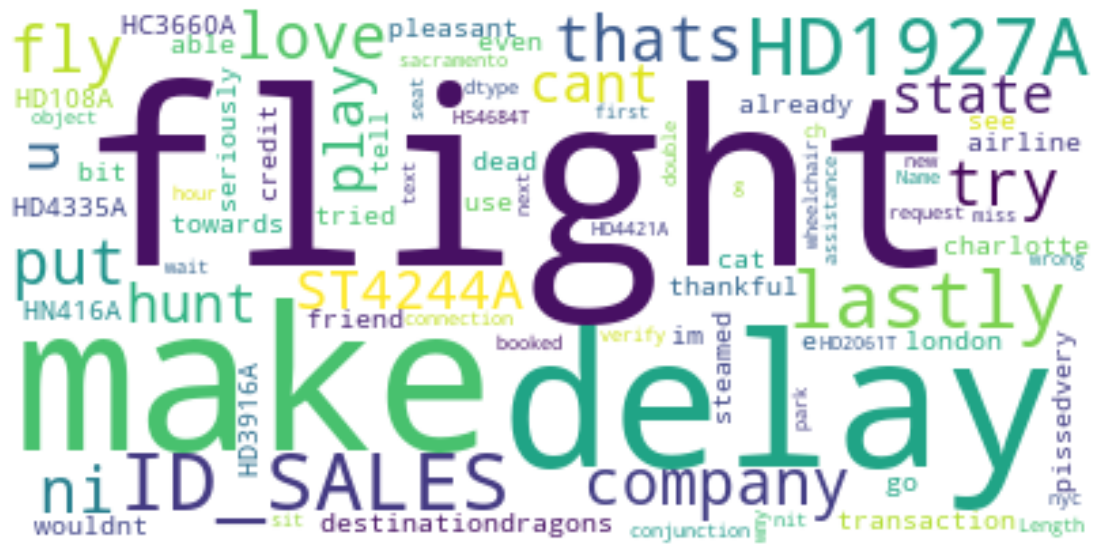

In [167]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 10]
# generate the word cloud
#for index, ID_SALES in enumerate(data.columns):
text_wc.generate(str(data_clean_OK.text))

# display the word cloud
plt.imshow(text_wc, interpolation='bilinear')
plt.axis('off')
plt.show()



In [168]:
#LSA
cv = CountVectorizer(min_df=1, max_df=1,stop_words=stopWords)
data_cv = cv.fit_transform(data_clean_OK.text)

In [169]:
data_cv

<12706x6241 sparse matrix of type '<class 'numpy.int64'>'
	with 6241 stored elements in Compressed Sparse Row format>

In [170]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words=stopWords)
tfidf = vectorizer.fit_transform(data_clean_OK.text)
len(vectorizer.get_feature_names())
data_tfidf = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names())
data_tfidf.index = data_clean_OK.index
data_tfidf

,aa,aaaand,aaalwayslate,aaba,aacom,aadelay,aadfw,aadv,aadvantage,aafail,...,ā²,ā²ä,ā³,āµ,āµfor,āµåā,ćø,ćøsfo,ćøä,ćøåā
ID_SALES,,,,,,,,,,,,,,,,,,,,,
HD1927A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ST4244A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HD108A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HD4335A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HN416A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HC3660A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HD3916A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HD2061T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [171]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=30)

svd_model.fit(data_tfidf)

print(svd_model.components_.shape)
print(svd_model.singular_values_)

(30, 10635)
[14.2619833  11.00255521 10.70413015  9.27491199  8.90508182  8.19388872
  7.9749192   7.83767968  7.58048185  7.11107854  7.01916739  6.8947592
  6.86028655  6.66537394  6.45920642  6.43357464  6.32987856  6.1824027
  6.14786493  6.04737046  5.9770899   5.93762233  5.8521462   5.81421401
  5.7772507   5.72482389  5.69056106  5.62298702  5.58940053  5.56022787]


In [172]:
#IDENTIFY TOPICS
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print("%.2f*%s "% (t[1], t[0]) ,end='')
    print("")

Topic 0: 
0.54*flight 0.26*get 0.22*thanks 0.22*cancel 0.18*hour 0.15*help 0.14*flightled 
Topic 1: 
0.94*thanks 0.06*thank 0.05*much 0.05*great 0.04*awesome 0.03*dm 0.03*follow 
Topic 2: 
0.97*thank 0.07*åā 0.06*much 0.06*great 0.05*follow 0.04*appreciate 0.04*dm 
Topic 3: 
0.54*flight 0.28*cancel 0.20*flightled 0.15*thanks 0.13*thank 0.06*tomorrow 0.04*late 
Topic 4: 
0.91*åā 0.22*fleek 0.22*fleet 0.08*flight 0.08*ä¼ćøā 0.07*rt 0.04*fly 
Topic 5: 
0.54*service 0.53*customer 0.16*flight 0.11*bad 0.10*ever 0.09*airline 0.08*great 
Topic 6: 
0.46*hour 0.29*delay 0.26*wait 0.18*plane 0.15*hold 0.12*gate 0.12*minute 
Topic 7: 
0.45*hold 0.36*hour 0.31*cancel 0.27*flightled 0.15*help 0.13*call 0.13*minute 
Topic 8: 
0.55*dm 0.40*follow 0.30*please 0.14*help 0.14*send 0.12*need 0.08*sent 
Topic 9: 
0.41*get 0.31*dm 0.26*follow 0.24*delay 0.23*hour 0.16*service 0.15*customer 
Topic 10: 
0.61*fleek 0.60*fleet 0.23*rt 0.08*flight 0.08*customer 0.07*service 0.06*get 
Topic 11: 
0.60*help 0.19*f

In [173]:
#APPLY VADER
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
vader_score = data_clean_OK['text'].apply(lambda text: sid.polarity_scores(text))
vader_score

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\giacollo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


ID_SALES
HD1927A    {'neg': 0.0, 'neu': 0.611, 'pos': 0.389, 'comp...
ST4244A    {'neg': 0.203, 'neu': 0.797, 'pos': 0.0, 'comp...
HD108A     {'neg': 0.0, 'neu': 0.377, 'pos': 0.623, 'comp...
HD4335A    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
HN416A     {'neg': 0.51, 'neu': 0.245, 'pos': 0.245, 'com...
                                 ...                        
HC3660A    {'neg': 0.0, 'neu': 0.608, 'pos': 0.392, 'comp...
HD3916A    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
HD2061T    {'neg': 0.438, 'neu': 0.562, 'pos': 0.0, 'comp...
HS4684T    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
HD4421A    {'neg': 0.446, 'neu': 0.462, 'pos': 0.092, 'co...
Name: text, Length: 12706, dtype: object

In [175]:
# DEFINE POLARITY/SUBJECTIVITY
from textblob import TextBlob
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
data_clean_OK['polarity'] = data_clean_OK['text'].apply(pol)
data_clean_OK['subjectivity'] = data_clean_OK['text'].apply(sub)
data_clean_OK


,text,polarity,subjectivity
ID_SALES,,,
HD1927A,lastly company thats try put love fly would ni...,0.380000,0.573333
ST4244A,u cant get state play hunt destinationdragons ...,0.000000,0.000000
HD108A,already pleasant flight london charlotte make ...,0.426667,0.673333
HD4335A,could even see tried make transaction wouldnt ...,0.000000,0.000000
HN416A,seriously cat dead im go pissedvery thankful e...,-0.511111,0.688889
...,...,...,...
HC3660A,friend tell able use credit airline towards on...,0.500000,0.625000
HD3916A,bit steamed conjunction wmy new wait first sit...,0.193182,0.393939
HD2061T,nyc flight delay miss connection sacramento ch...,0.000000,0.000000


In [176]:
#AGGREGATED DATA
aggregate_result_pol = data_clean_OK.groupby('ID_SALES').agg({'polarity': ['mean', 'min', 'max', 'count']}) 
aggregate_result_sub = data_clean_OK.groupby('ID_SALES').agg({'subjectivity': ['mean', 'min', 'max', 'count']}) 
merge_df=pd.merge(left=aggregate_result_pol, right=aggregate_result_sub, on='ID_SALES')
merge_df

polarity                  subjectivity                     
              mean  min   max count         mean       min  max count
ID_SALES                                                             
CC1387A   0.766667  0.3  1.00     3     0.829167  0.487500  1.0     3
CC139A    0.000000  0.0  0.00     3     0.000000  0.000000  0.0     3
CC1701A   1.000000  1.0  1.00     3     0.533333  0.300000  1.0     3
CC1773A   1.000000  1.0  1.00     3     1.000000  1.000000  1.0     3
CC1830A   0.000000  0.0  0.00     3     0.000000  0.000000  0.0     3
...            ...  ...   ...   ...          ...       ...  ...   ...
ST60A    -1.000000 -1.0 -1.00     3     1.000000  1.000000  1.0     3
ST809A    0.266667  0.0  0.80     3     0.300000  0.000000  0.9     3
ST925A   -0.933333 -1.0 -0.80     3     1.000000  1.000000  1.0     3
ST928A    0.000000  0.0  0.00     3     0.200000  0.000000  0.6     3
ST960A   -0.554762 -1.0  0.05     3     0.880159  0.783333  1.0     3

[4148 rows x 8 columns]

In [177]:
#merge between sales dataset and twitter dataset
merge_sales=pd.merge(left=data_clean_OK, right=sales, on='ID_SALES')
merge_sales

,text,polarity,subjectivity,Program_Code,From_Grade,To_Grade,Group_State,Days,Travel_Type,Departure_Date,...,SPR_Product_Type,FPP,Total_Pax,DepartureMonth,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,FPP_to_School_enrollment,Retained
ID_SALES,,,,,,,,,,,,,,,,,,,,,
HD1927A,lastly company thats try put love fly would ni...,0.38,0.573333,HD,9.0,9.0,TX,12,A,03/08/2019,...,East Coast,17,18,January,Middle,Middle,Middle->Middle,H,"0,011216576510485",1
HD1927A,offer real food american club like amaze food ...,0.10,0.150000,HD,9.0,9.0,TX,12,A,03/08/2019,...,East Coast,17,18,January,Middle,Middle,Middle->Middle,H,"0,011216576510485",1
HD1927A,dm send thanks much respond response timely miss,0.20,0.200000,HD,9.0,9.0,TX,12,A,03/08/2019,...,East Coast,17,18,January,Middle,Middle,Middle->Middle,H,"0,011216576510485",1
ST4244A,u cant get state play hunt destinationdragons ...,0.00,0.000000,ST,8.0,10.0,MD,17,A,06/22/2019,...,Science,2,3,January,Middle,Middle,Middle->Middle,S,"0,002730727808464",1
ST4244A,ever reinstate cancel flighted flight,0.00,0.000000,ST,8.0,10.0,MD,17,A,06/22/2019,...,Science,2,3,January,Middle,Middle,Middle->Middle,S,"0,002730727808464",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SK4426A,unpleasant experience phone one agent cancel f...,-0.65,0.950000,SK,5.0,9.0,TX,19,A,06/03/2019,...,Science,5,7,January,Undefined,Undefined,Undefined->Undefined,S,NaN,0
SK4426A,hotel still dont work folder business casual c...,-0.60,0.766667,SK,5.0,9.0,TX,19,A,06/03/2019,...,Science,5,7,January,Undefined,Undefined,Undefined->Undefined,S,NaN,0
HD4957A,sign bonus enroll elevate,0.00,0.000000,HD,10.0,10.0,TX,18,A,03/10/2019,...,East Coast,27,33,January,Middle,Middle,Middle->Middle,H,NaN,1


In [ ]:
#DEFINE POSITIVE AND NEGATIVE THRESHOLD POLARITY
T1_POS=data_clean_OK['polarity']>=0,5
T2_POS=data_clean_OK['polarity']<0,5 and data_clean_OK['polarity']>=0
T1_NEG=data_clean_OK['polarity']>=-0,5 and data_clean_OK['polarity']<=-0
T2_NEG=data_clean_OK['polarity']<-0,5 and data_clean_OK['polarity']>=-1